## Programming Assignment 1 

In [202]:
import numpy as np
import time
import pandas as pd
import time
import math

In [203]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [204]:
def funQ(x, y):
    return (1.125*x*x) + (0.5*x*y) + (0.75*y*y) + (2*x) + (2*y) 

def funLL(x ,y):
    return 0.5 * (x*x + y*y) + 50 * np.log(1 + np.exp(-0.5*y)) + 50 * np.log(1 + np.exp(0.2*x))

def funH(x, y):
    return (0.1*(x*x + y - 11)*(x*x + y - 11)) + (0.1*(x + y*y - 7)*(x + y*y - 7))

def funR(x, y):
    return (0.002*(1 - x)*(1 - x)) + (0.2*(y - x*x)*(y - x*x))

#### 1. Plotting graphs

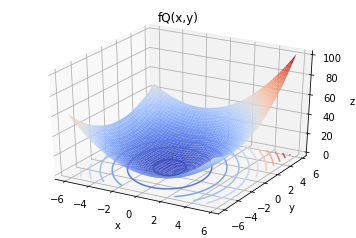

In [205]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(x, y)
zs = np.array([funQ(x, y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.contour(X, Y, Z, 10, lw=3, offset=-1, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('fQ(x,y)')

plt.show()

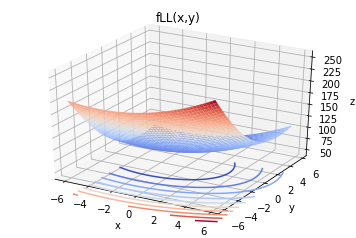

In [206]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(x, y)
zs = np.array([funLL(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.contour(X, Y, Z, 10, lw=3, offset=-1, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('fLL(x,y)')

plt.show()

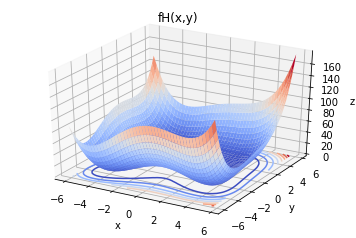

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(x, y)
zs = np.array([funH(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.contour(X, Y, Z, 10, lw=3, offset=-1, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('fH(x,y)')


plt.show()

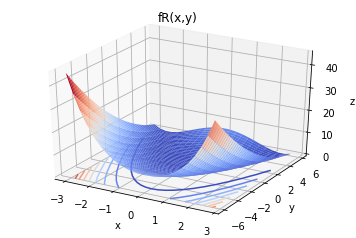

In [208]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-3, 3, 0.25)
y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(x, y)
zs = np.array([funR(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.contour(X, Y, Z, 10, lw=3, offset=-1, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('fR(x,y)')


plt.show()

#### Solution 1  
Functions f<sub>Q</sub> and f<sub>LL</sub> are convex. Functions f<sub>H</sub> and f<sub>R</sub> are non-convex.

#### 2. Gradient Descent

In [209]:
def dfunQ(x, y):
    dx = (2.25*x) + (0.5*y) + 2
    dy = (1.5*y) + (0.5*x) + 2
    return (dx, dy)

def dfunLL(x, y):
    dx = x + (10 * math.exp(0.2*x))/(1 + math.exp(0.2*x))
    dy = y - (25 * math.exp(-0.5*y))/(1 + math.exp(-0.5*y))
    return (dx, dy)

def dfunH(x, y):
    dx = (0.2*( (x*x) + y - 11)*2*x) + (0.2*(x + y**2 -7))
    dy = (0.2*(x*x + y - 11)) + (0.2*(x + y**2 -7)*2*y)
    return (dx, dy)

def dfunR(x, y):
    dx = (0.004*(x-1)) - (0.2*2*(y - x*x)*2*x)
    dy = (0.4*(y-x*x))
    return (dx, dy)

In [210]:
functionNames = ['funQ(x,y)', 'funLL(x,y)', 'funH(x,y)', 'funR(x,y)']
stepSizes = [0.1, 0.01, 0.3]
startingPoints = [(2.0, 3.0)]

startingPoints1 = [(2.0, 3.0)]
startingPoints2 = [(2.0, 3.0)]

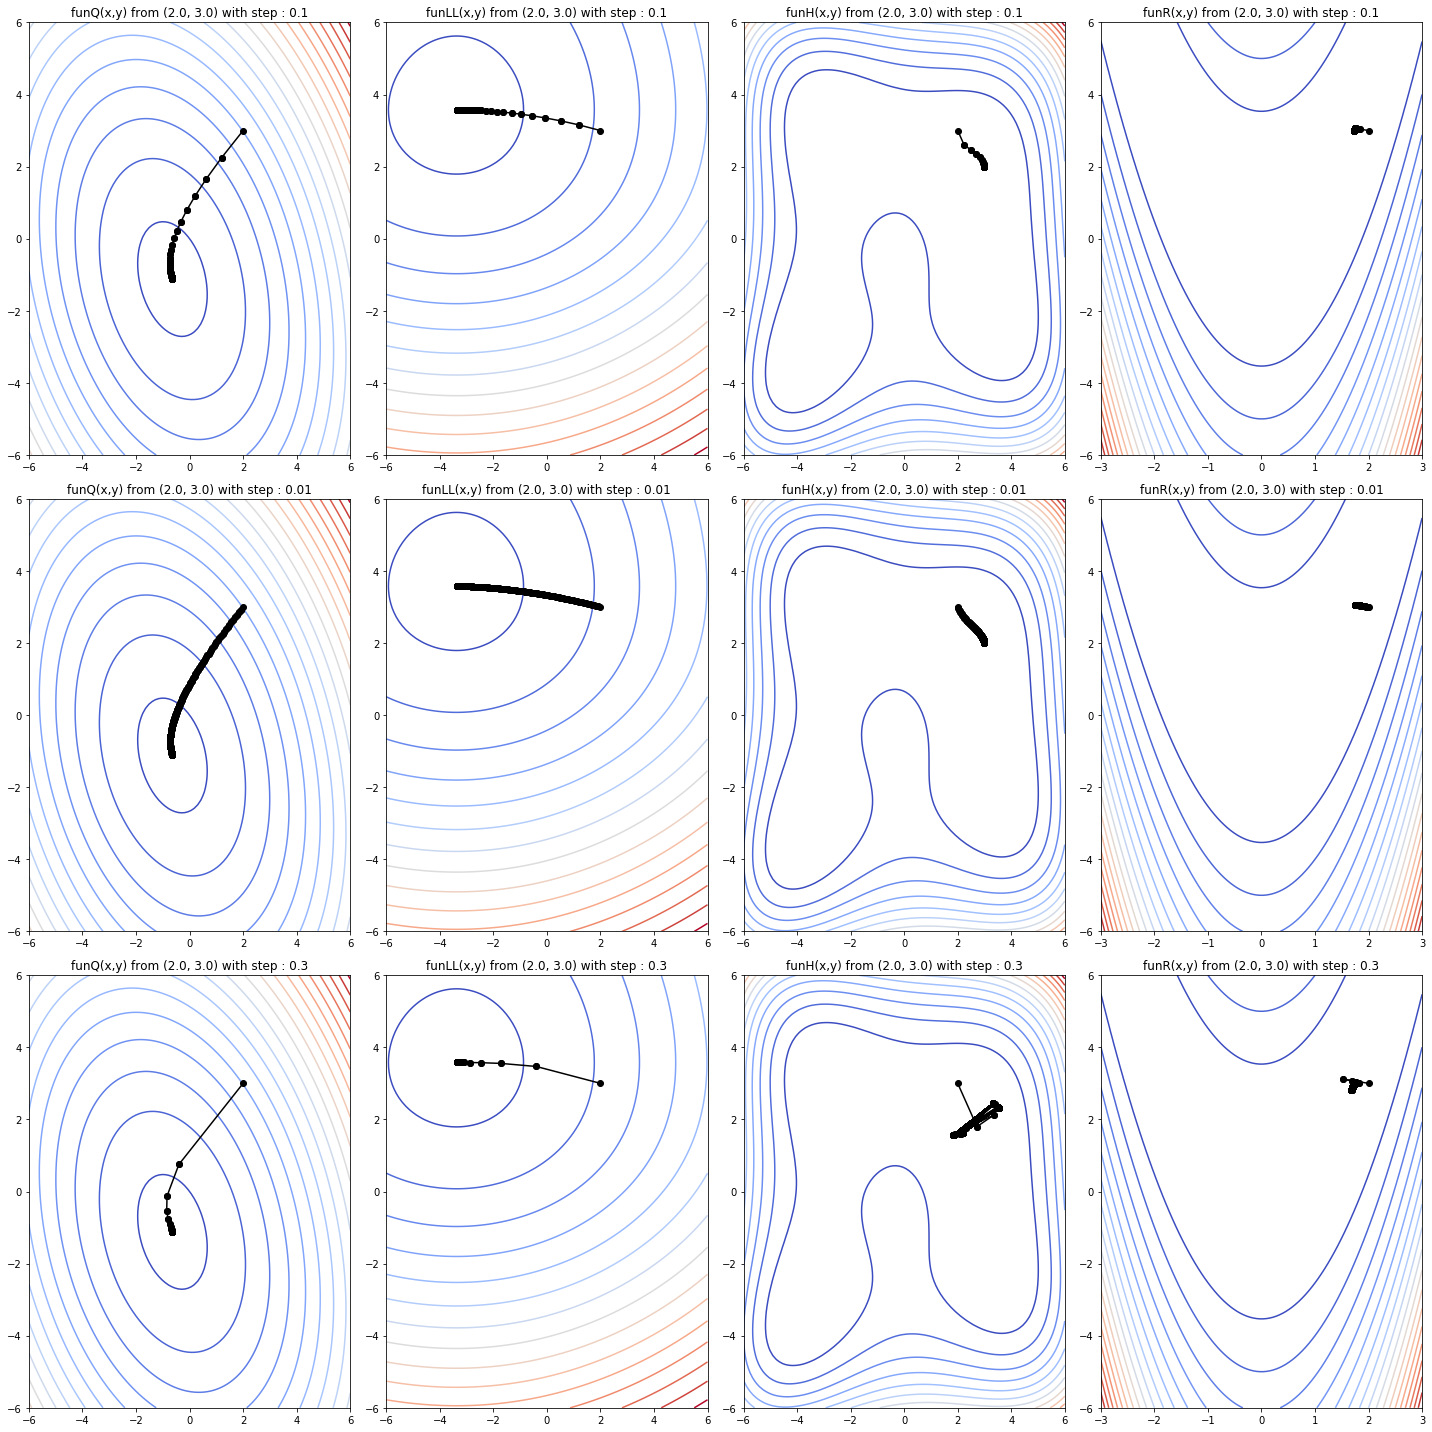

In [211]:
fig = plt.figure(figsize=(20, 20))

for j in range(0, len(stepSizes)):
    for k in range(0, len(functionNames)):
        currX, currY = startingPoints[0]
        plotSize = 341 + (j*4) + k
        if plotSize > 349:
            ax = fig.add_subplot(3,4,1 + (j*4) + k)
        else:
            ax = fig.add_subplot(plotSize)

        if k == 0:
            x = y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
            ax.contour(X, Y, funQ(X, Y), 20, cmap=cm.coolwarm)
        elif k == 1:
            x = y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
            ax.contour(X, Y, funLL(X, Y), 20, cmap=cm.coolwarm)
        elif k == 2:
            x = y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
            ax.contour(X, Y, funH(X, Y), 20, cmap=cm.coolwarm)
        else:
            x = np.linspace(-3, 3, 100)
            y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
            ax.contour(X, Y, funR(X, Y), 20, cmap=cm.coolwarm)

        count = 0
        while count < 1000:
            prevX, prevY = currX, currY
            count += 1

            if k == 0:
                dX, dY = dfunQ(prevX, prevY)
            elif k == 1:
                dX, dY = dfunLL(prevX, prevY)
            elif k == 2:
                dX, dY = dfunH(prevX, prevY)
            else:
                dX, dY = dfunR(prevX, prevY)

            currX = prevX - stepSizes[j]*dX
            currY = prevY - stepSizes[j]*dY
            ax.plot([prevX, currX], [prevY, currY], 'k-', marker = 'o')
            ax.set_title(functionNames[k] + ' from ' + str(startingPoints[0]) + ' with step : ' + str(stepSizes[j]))
plt.tight_layout()
plt.show()

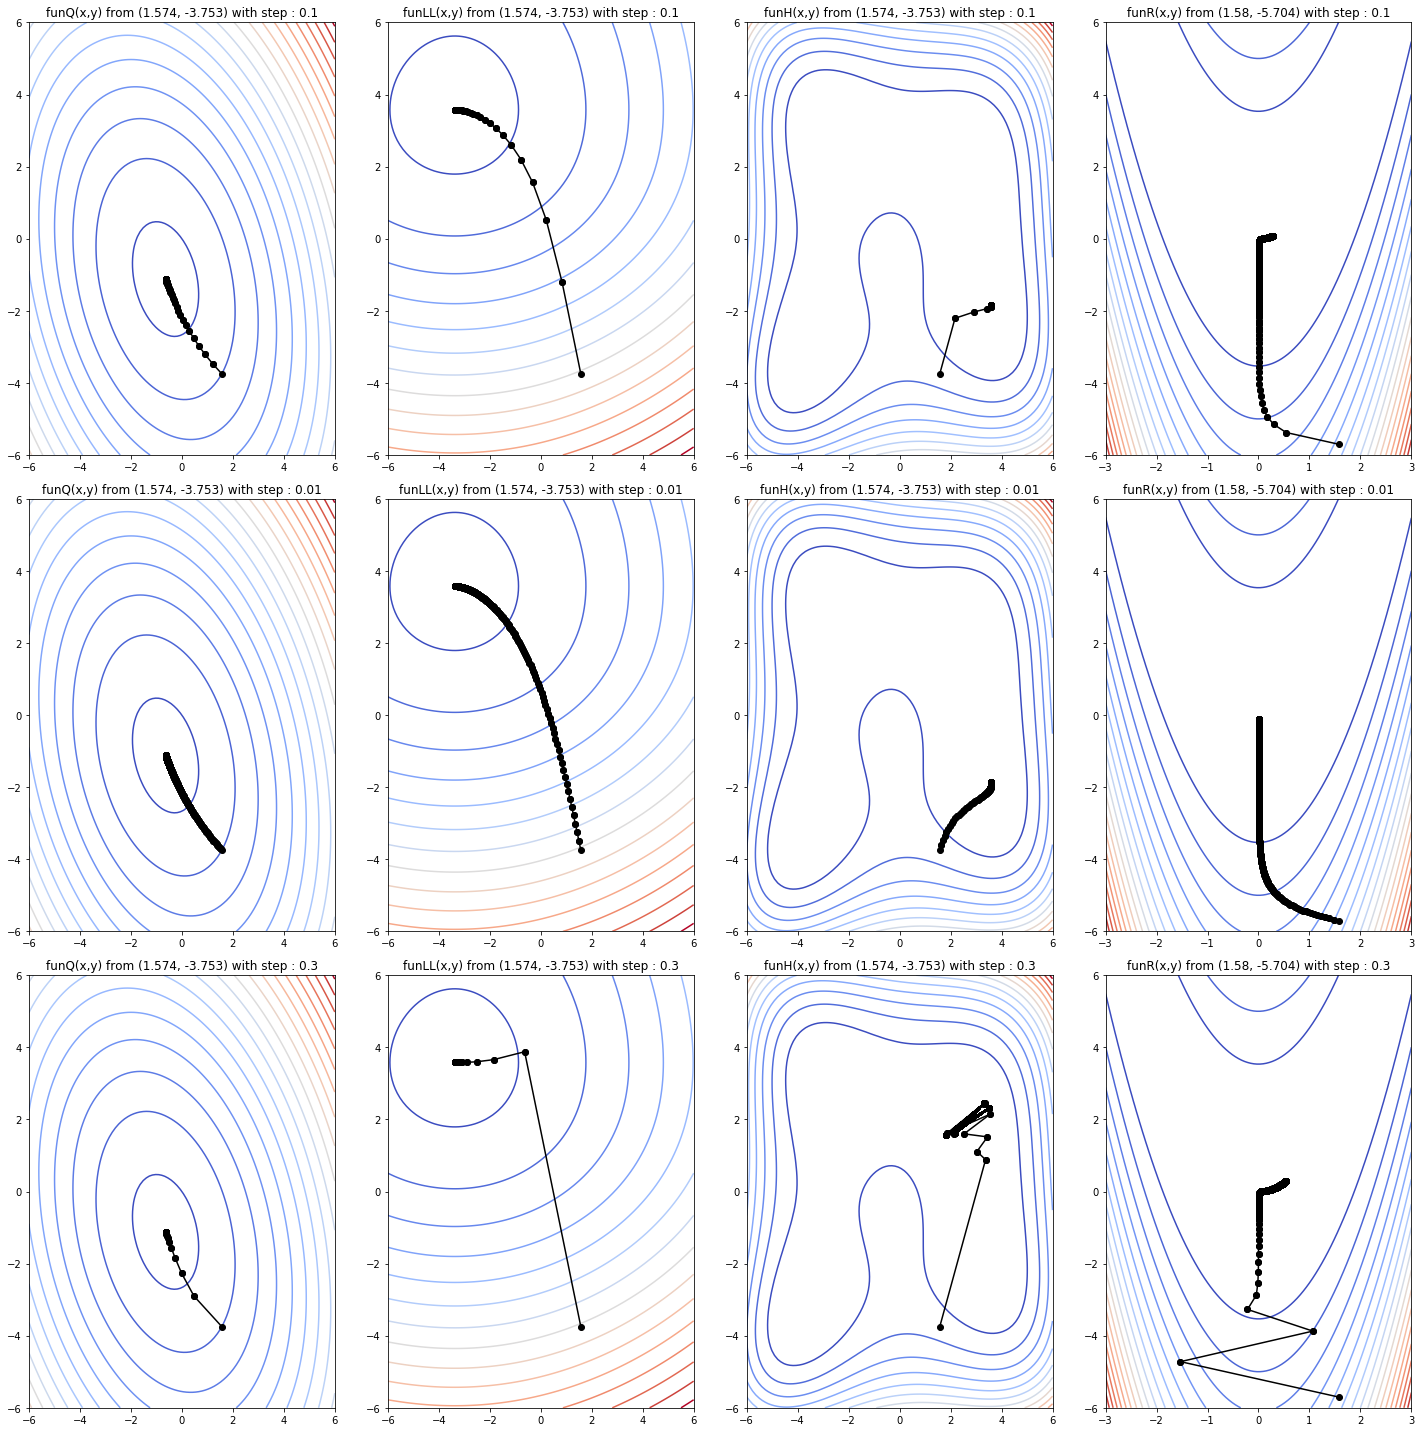

In [212]:
fig = plt.figure(figsize=(20, 20))

randX1, randY1 = np.random.uniform(-6, 6, 2)
currX1, currY1 = np.round(randX1, 3), np.round(randY1, 3)

randX2, randX4 = np.random.uniform(-3, 3, 2)
randY2, randY4 = np.random.uniform(-6, 6, 2)
currX2, currY2 = np.round(randX2, 3), np.round(randY2, 3)

startingPoints1.append((currX1, currY1))
startingPoints2.append((currX2, currY2))

for j in range(0, len(stepSizes)):
    for k in range(0, len(functionNames)):
        plotSize = 341 + (j*4) + k

        if plotSize > 349:
            ax = fig.add_subplot(3,4,1 + (j*4) + k)
        else:
            ax = fig.add_subplot(plotSize)


        if k <= 2:
            currX, currY = currX1, currY1
            x = y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
        else:
            currX, currY = currX2, currY2
            x = np.linspace(-3, 3, 100)
            y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)

        startingPointX, startingPointY  = (currX, currY)

        if k == 0: 
            ax.contour(X, Y, funQ(X, Y), 20, cmap=cm.coolwarm)
        elif k == 1:
            ax.contour(X, Y, funLL(X, Y), 20, cmap=cm.coolwarm)
        elif k == 2:
            ax.contour(X, Y, funH(X, Y), 20, cmap=cm.coolwarm)
        else:
            ax.contour(X, Y, funR(X, Y), 20, cmap=cm.coolwarm)

        count = 0
        while count < 1000:
            prevX, prevY = currX, currY
            count += 1

            if k == 0:
                dX, dY = dfunQ(prevX, prevY)
            elif k == 1:
                dX, dY = dfunLL(prevX, prevY)
            elif k == 2:
                dX, dY = dfunH(prevX, prevY)
            else:
                dX, dY = dfunR(prevX, prevY)

            currX = prevX - stepSizes[j]*dX
            currY = prevY - stepSizes[j]*dY
            ax.plot([prevX, currX], [prevY, currY], 'k-', marker = 'o')
            ax.set_title(functionNames[k] + ' from (' + str(startingPointX) + ', ' + str(startingPointY) + ') with step : ' + str(stepSizes[j]))
plt.tight_layout()
plt.show()

/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in double_scalars
/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars
/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in double_scalars


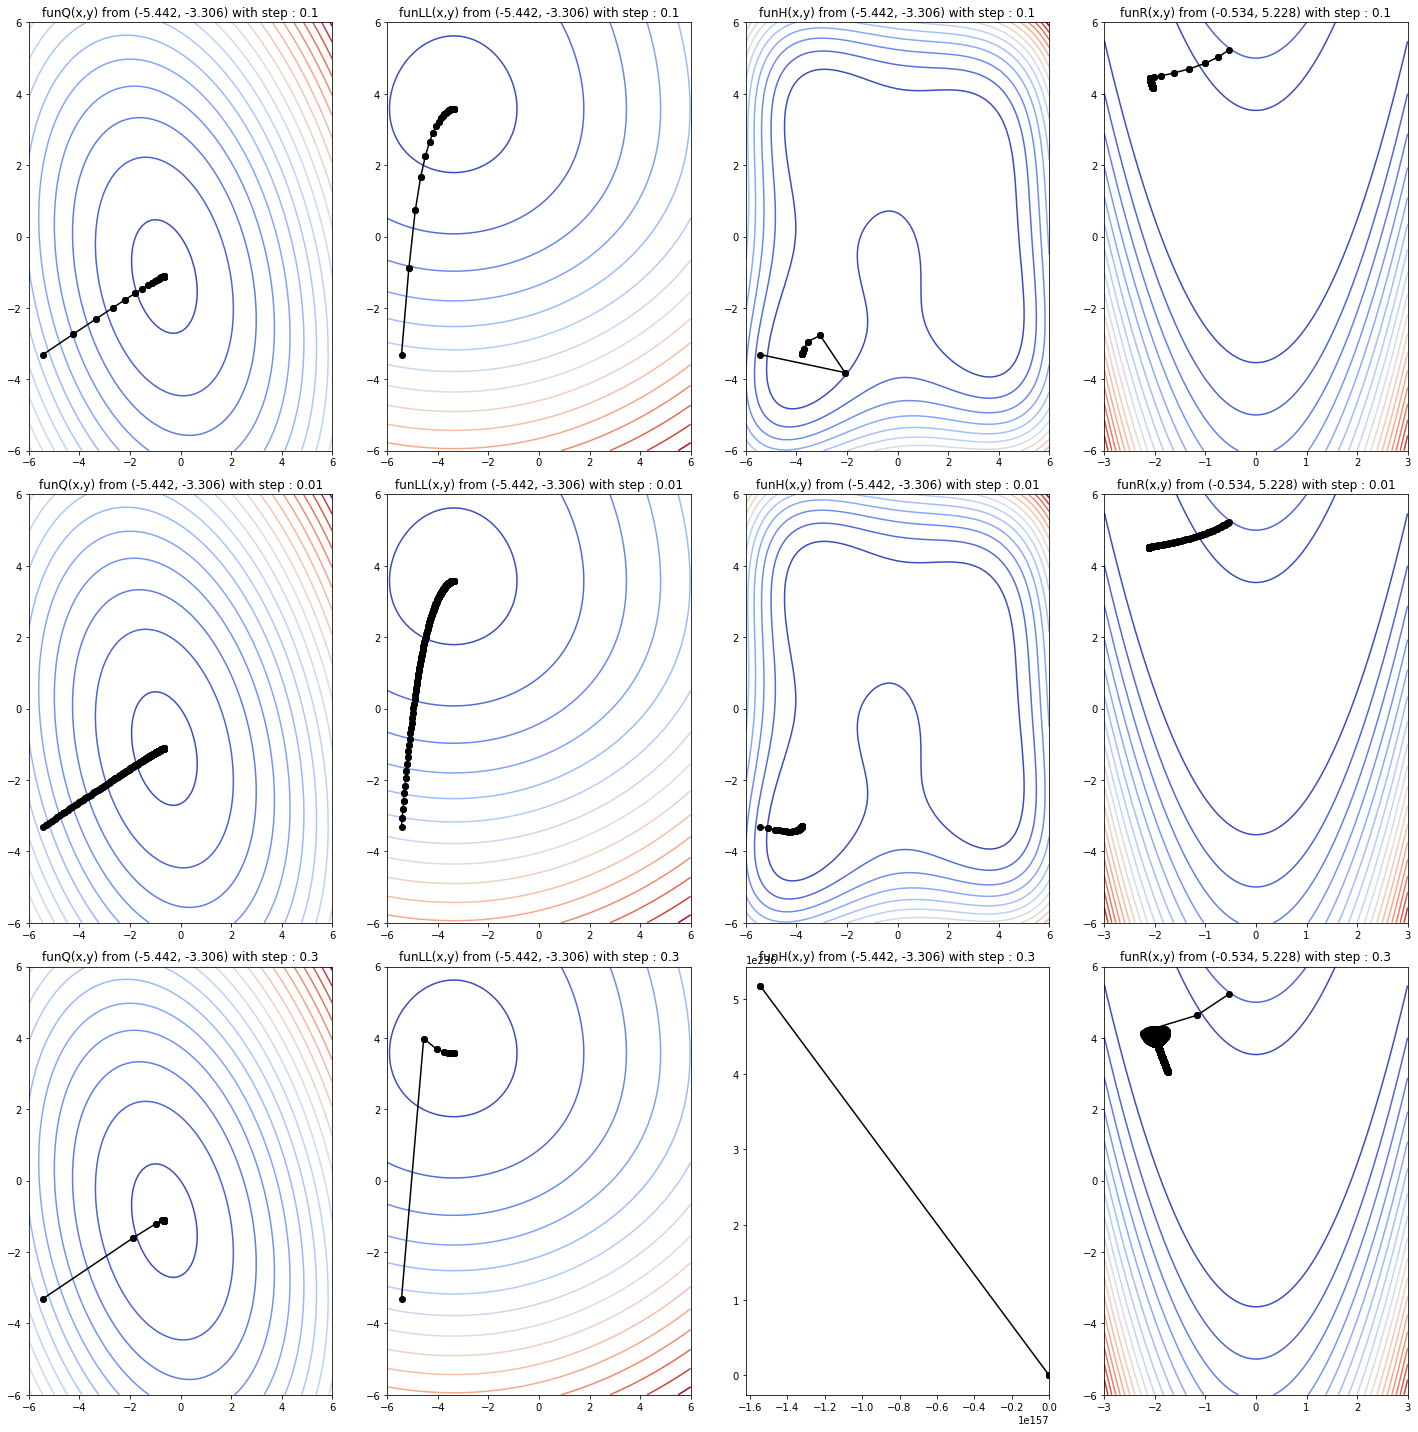

In [213]:
fig = plt.figure(figsize=(20, 20))

randX1, randY1 = np.random.uniform(-6, 6, 2)
currX1, currY1 = np.round(randX1, 3), np.round(randY1, 3)
currX2, currY2 = np.round(randX4, 3), np.round(randY4, 3)

startingPoints1.append((currX1, currY1))
startingPoints2.append((currX2, currY2))

for j in range(0, len(stepSizes)):
    for k in range(0, len(functionNames)):
        plotSize = 341 + (j*4) + k

        if plotSize > 349:
            ax = fig.add_subplot(3,4,1 + (j*4) + k)
        else:
            ax = fig.add_subplot(plotSize)


        if k <= 2:
            currX, currY = currX1, currY1
            x = y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
        else:
            currX, currY = currX2, currY2
            x = np.linspace(-3, 3, 100)
            y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)

        startingPointX, startingPointY  = (currX, currY)

        if k == 0: 
            ax.contour(X, Y, funQ(X, Y), 20, cmap=cm.coolwarm)
        elif k == 1:
            ax.contour(X, Y, funLL(X, Y), 20, cmap=cm.coolwarm)
        elif k == 2:
            ax.contour(X, Y, funH(X, Y), 20, cmap=cm.coolwarm)
        else:
            ax.contour(X, Y, funR(X, Y), 20, cmap=cm.coolwarm)

        count = 0
        while count < 1000:
            
            prevX, prevY = currX, currY
            count += 1

            if k == 0:
                dX, dY = dfunQ(prevX, prevY)
            elif k == 1:
                dX, dY = dfunLL(prevX, prevY)
            elif k == 2:
                dX, dY = dfunH(prevX, prevY)
            else:
                dX, dY = dfunR(prevX, prevY)

            currX = prevX - stepSizes[j]*dX
            currY = prevY - stepSizes[j]*dY
            ax.plot([prevX, currX], [prevY, currY], 'k-', marker = 'o')
            ax.set_title(functionNames[k] + ' from (' + str(startingPointX) + ', ' + str(startingPointY) + ') with step : ' + str(stepSizes[j]))
plt.tight_layout()
plt.show()

#### Solution 2 

Function f<sub>Q</sub> always seems to converge, as the function is 1.5 strongly convex. This function is leibniz bound in a norm ball.
Function f<sub>LL</sub> also seems to converge. This function is leibniz bound, hence converges faster.
Function f<sub>H</sub> as expected from non-convex functions, this functions attains a local minima. Not leibniz bound.
Function f<sub>R</sub> Same goes with this function too as the above, this function has a valley where it converges easily.


#### 3. Gradient Descent with backtracking line search

In [214]:
alpha = 0.5
beta = 0.5
maxBacktracks = 10
intialStepSize = 1

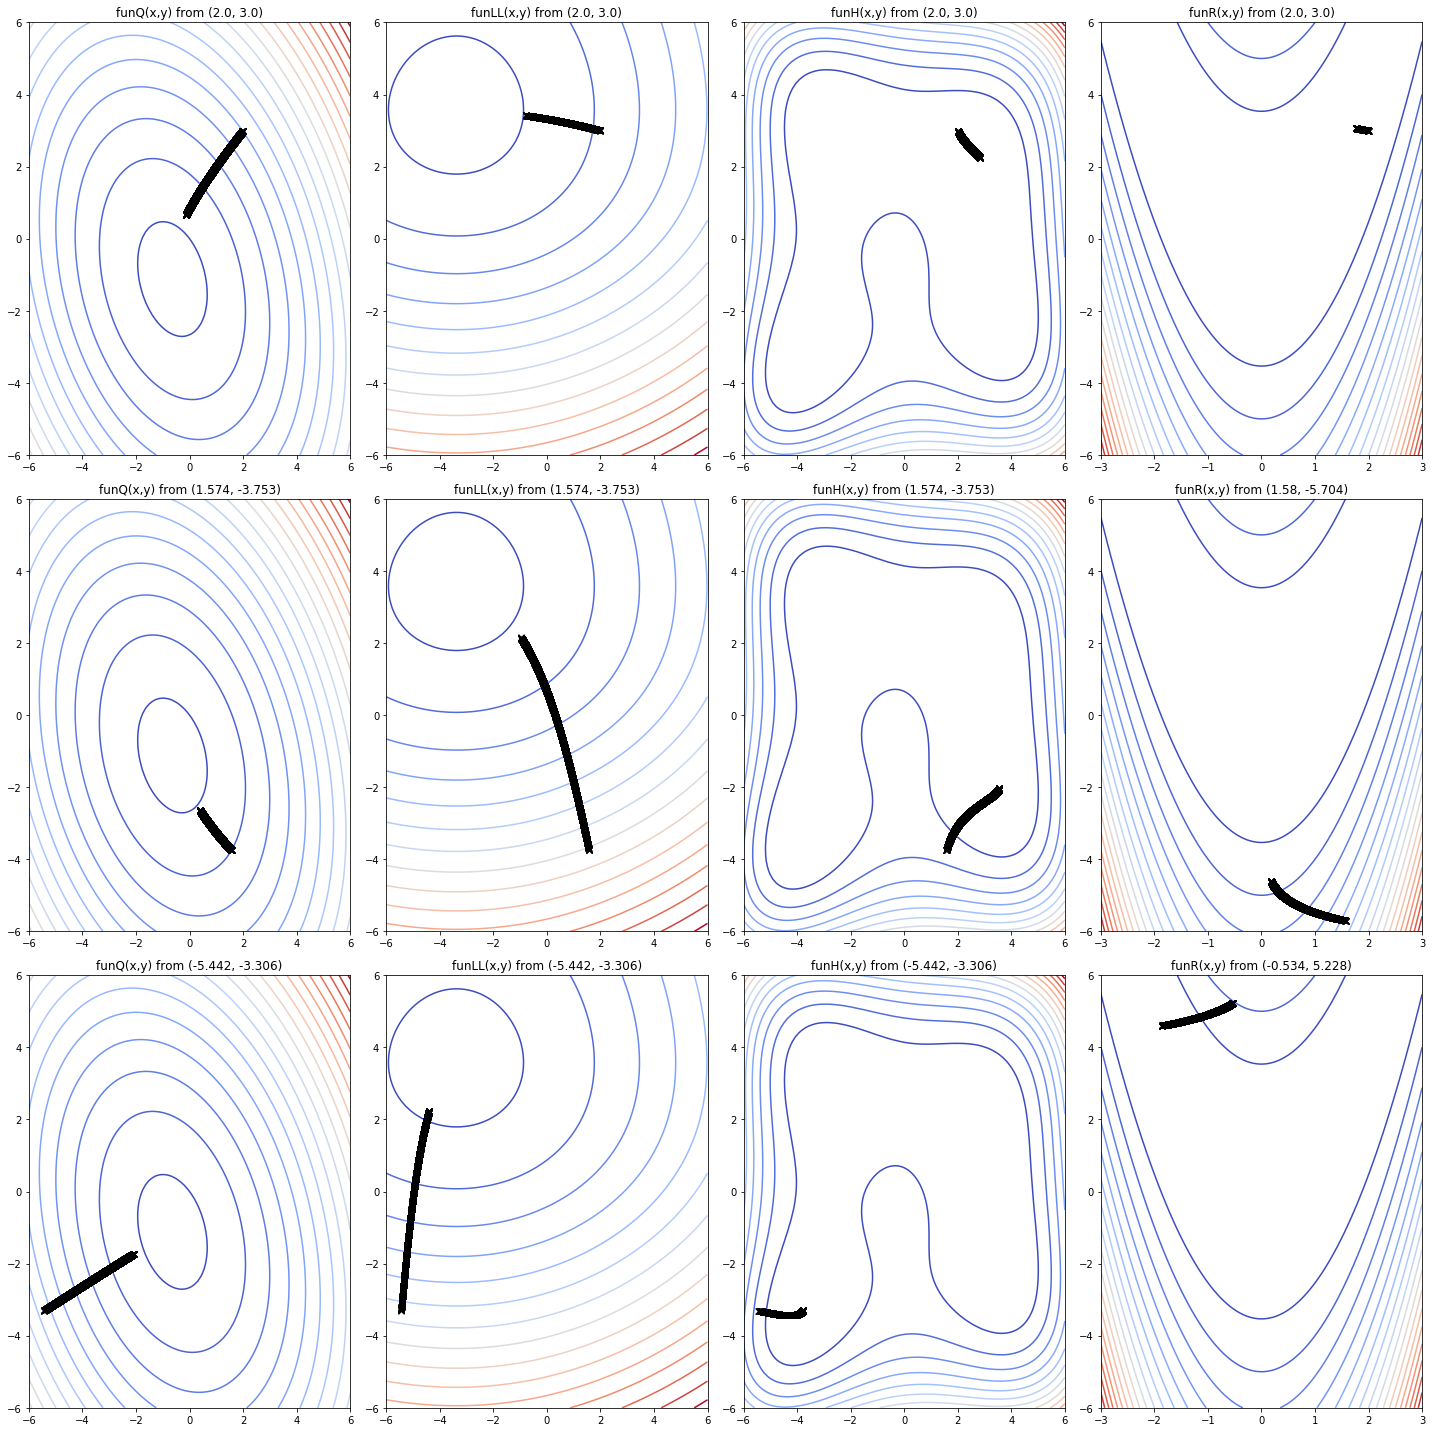

In [215]:
fig = plt.figure(figsize=(20, 20))
for j in range(0, len(startingPoints1)):
    for k in range(0, len(functionNames)):
        
        plotSize = 341 + (j*4) + k
        
        if plotSize > 349:
            ax = fig.add_subplot(3,4,1 + (j*4) + k)
        else:
            ax = fig.add_subplot(plotSize)

        if k <= 2:
            currX, currY = startingPoints1[j]
            x = y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
        else:
            currX, currY = startingPoints2[j]
            x = np.linspace(-3, 3, 100)
            y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
                
        startingPointX, startingPointY  = (currX, currY)

        if k == 0: 
            ax.contour(X, Y, funQ(X, Y), 20, cmap=cm.coolwarm)
        elif k == 1:
            ax.contour(X, Y, funLL(X, Y), 20, cmap=cm.coolwarm)
        elif k == 2:
            ax.contour(X, Y, funH(X, Y), 20, cmap=cm.coolwarm)
        else:
            ax.contour(X, Y, funR(X, Y), 20, cmap=cm.coolwarm)
        
        stepSz = intialStepSize
        numberOfBacktracks = 0
        
        count = 0
        while count < 1000:
            
            prevX, prevY = currX, currY

            if k == 0:
                dX, dY = dfunQ(prevX, prevY)
                someValue = funQ(prevX - (stepSz*dX), prevY - (stepSz*dY))
                anotherValue = funQ(prevX, prevY) - (alpha*stepSz*((dX*dX) + (dY*dY)))
            elif k == 1:
                dX, dY = dfunLL(prevX, prevY)
                someValue = funLL(prevX - (stepSz*dX), prevY - (stepSz*dY))
                anotherValue = funLL(prevX, prevY) - (alpha*stepSz*((dX*dX) + (dY*dY)))
            elif k == 2:
                dX, dY = dfunH(prevX, prevY)
                someValue = funH(prevX - (stepSz*dX), prevY - (stepSz*dY))
                anotherValue = funH(prevX, prevY) - (alpha*stepSz*((dX*dX) + (dY*dY)))
            else:
                dX, dY = dfunR(prevX, prevY)
                someValue = funR(prevX - (stepSz*dX), prevY - (stepSz*dY))
                anotherValue = funR(prevX, prevY) - (alpha*stepSz*((dX*dX) + (dY*dY)))
                
                
            while someValue > anotherValue:
                
                if numberOfBacktracks > 10:
                    break
                
                numberOfBacktracks += 1
                stepSz = beta*stepSz
                
            

            currX = prevX - (stepSz*dX)
            currY = prevY - (stepSz*dY)
            ax.plot([prevX, currX], [prevY, currY], 'k-', marker = 'x')
            ax.set_title(functionNames[k] + ' from (' + str(startingPointX) + ', ' + str(startingPointY) + ')')
            count += 1
            
plt.tight_layout()
plt.show()

            

#### Solution 3
From the earlier argument, when the function is convex and is converging faster, then the function with backtracking will converge slighly more faster.

Function f<sub>Q</sub> and Function f<sub>LL</sub> will converge faster, seems like second could be much faster.
Function f<sub>H</sub> and Function f<sub>R</sub> also converge  faster to a local minimum compared to the case without backtracking, also without much fluctuations

#### 4. Gradient descent with step size = 1/k

/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in double_scalars
/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars
/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in double_scalars
/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in double_scalars
/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in double_scalars
/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ky/anaconda3/envs/Py27/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/ky/anaconda3/

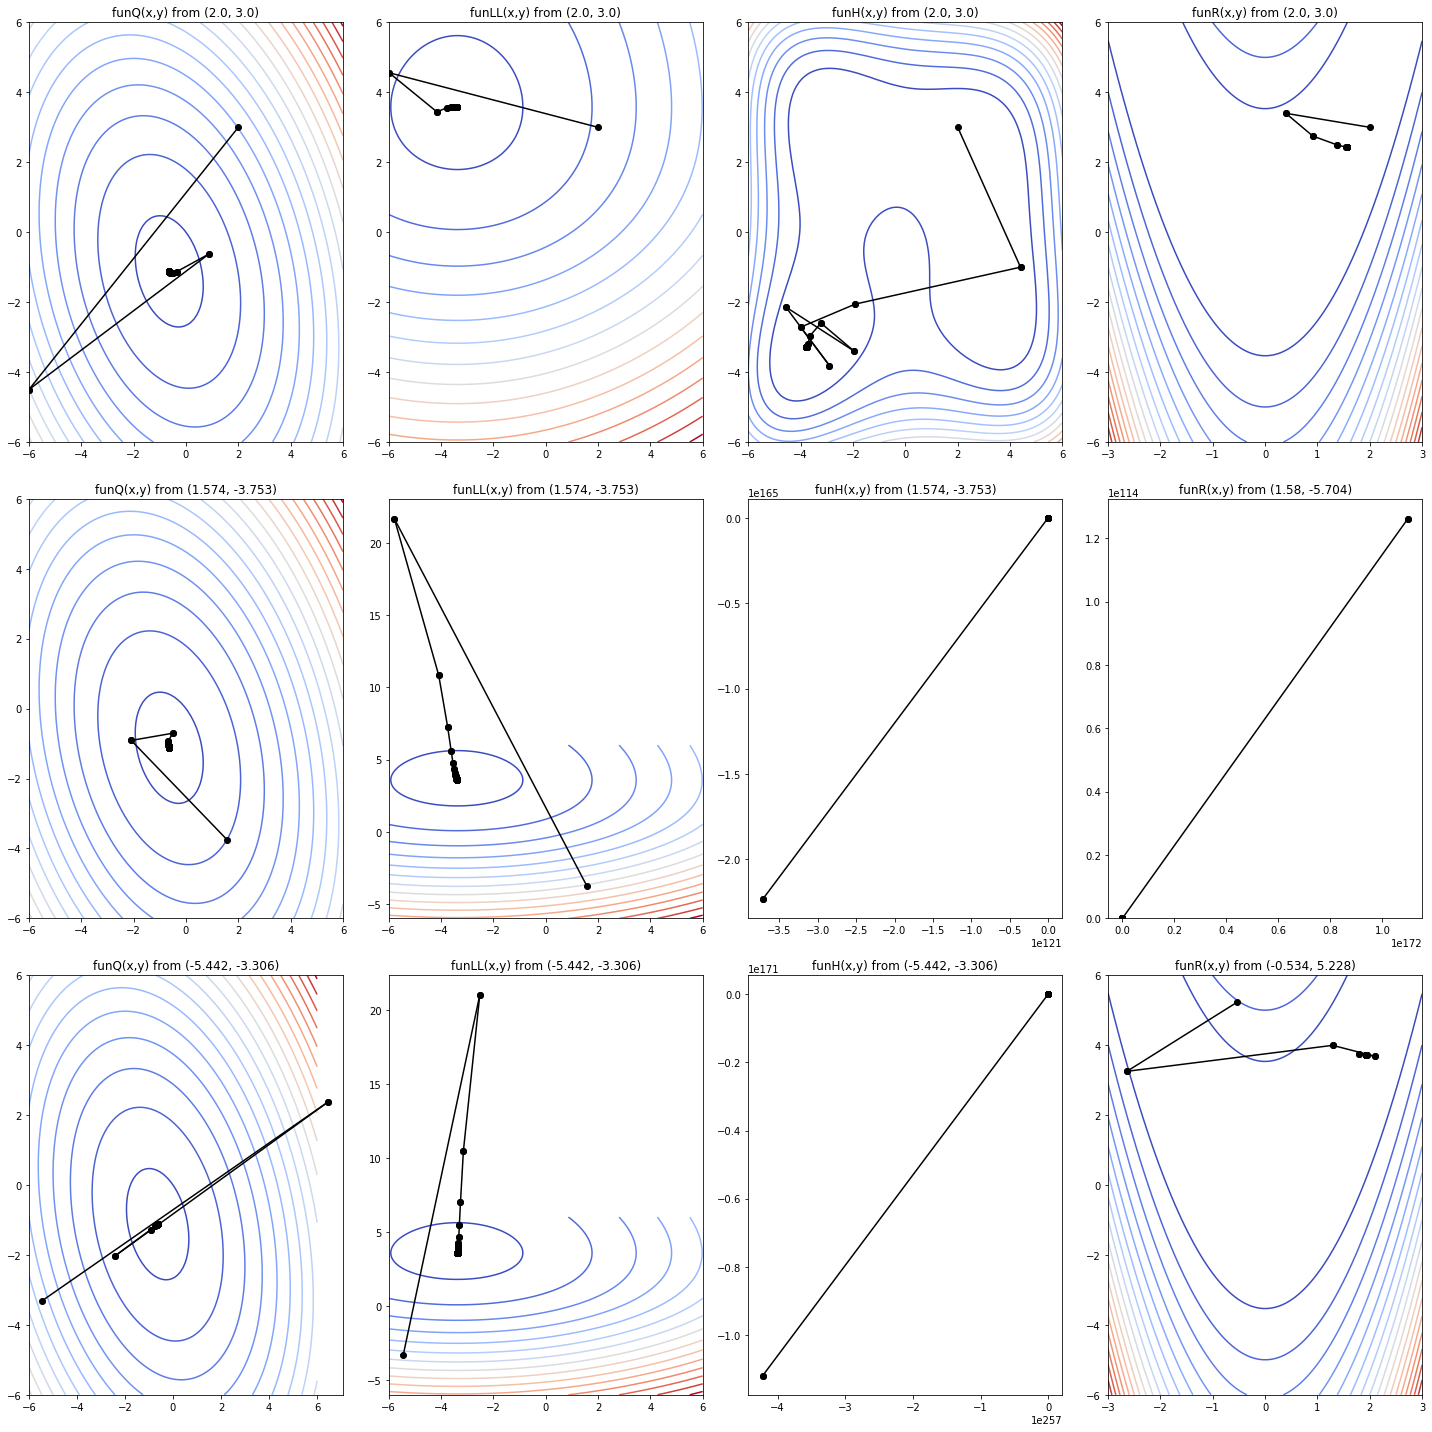

In [220]:
fig = plt.figure(figsize=(20, 20))

for j in range(0, len(startingPoints1)):
    for k in range(0, len(functionNames)):
        plotSize = 341 + (j*4) + k

        if plotSize > 349:
            ax = fig.add_subplot(3,4,1 + (j*4) + k)
        else:
            ax = fig.add_subplot(plotSize)


        if k <= 2:
            currX, currY = startingPoints1[j]
            x = y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)
        else:
            currX, currY = startingPoints2[j]
            x = np.linspace(-3, 3, 100)
            y = np.linspace(-6, 6, 100)
            X, Y = np.meshgrid(x, y)

        startingPointX, startingPointY  = (currX, currY)

        if k == 0: 
            ax.contour(X, Y, funQ(X, Y), 20, cmap=cm.coolwarm)
        elif k == 1:
            ax.contour(X, Y, funLL(X, Y), 20, cmap=cm.coolwarm)
        elif k == 2:
            ax.contour(X, Y, funH(X, Y), 20, cmap=cm.coolwarm)
        else:
            ax.contour(X, Y, funR(X, Y), 20, cmap=cm.coolwarm)

        count = 0
        while count < 1000:
            
            prevX, prevY = currX, currY

            if k == 0:
                dX, dY = dfunQ(prevX, prevY)
            elif k == 1:
                dX, dY = dfunLL(prevX, prevY)
            elif k == 2:
                dX, dY = dfunH(prevX, prevY)
            else:
                dX, dY = dfunR(prevX, prevY)

            currX = prevX - (1/(count+1.0))*dX
            currY = prevY - (1/(count+1.0))*dY
            
            ax.plot([prevX, currX], [prevY, currY], 'k-', marker = 'o')
            count += 1
            ax.set_title(functionNames[k] + ' from (' + str(startingPointX) + ', ' + str(startingPointY) + ')')
plt.tight_layout()
plt.show()

#### Solution 4 : 

We can see from the above figures, take (2, 3) as starting point for example, the convergence fluctuates a lot. The main reason being the step sizes being huge. f<sub>H</sub> can be seen to fluctuate the most until it stops after many jumps.  

#### 5. Explain why for some problems large step sizes don’t work.

If the step size exceeds twice the largest eigenvalue of the Hessain matrix and the function is locally apppoximately a quadratic funtion, then the trajectory will oscillate and diverge.